# Clinical - Trial Survival Analysis for Treatment Efficiency

In [2]:
! pip install lifelines --quiet

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter , CoxPHFitter
from lifelines.statistics import logrank_test

In [4]:
# Load dataset
df = pd.read_csv('veteran.csv')
df.head()

,ID,TIME,Y,trt,celltype,karno,diagtime,age,priortherapy
0,1,0,0,standard,squamous,60,7,69,no
1,1,72,1,standard,squamous,60,7,69,no
2,2,0,0,standard,squamous,70,5,64,yes
3,2,411,1,standard,squamous,70,5,64,yes
4,3,0,0,standard,squamous,60,3,38,no


In [5]:
df.sample(30)

,ID,TIME,Y,trt,celltype,karno,diagtime,age,priortherapy
204,103,0,0,test,smallcell,70,2,70,no
4,3,0,0,standard,squamous,60,3,38,no
171,86,30,1,test,squamous,70,11,63,no
263,132,340,1,test,large,80,10,64,yes
188,95,0,0,test,smallcell,40,36,44,yes
116,59,0,0,standard,large,60,12,63,no
29,15,11,1,standard,squamous,70,11,48,yes
142,72,0,0,test,squamous,80,3,48,no
38,20,0,0,standard,smallcell,60,4,56,no
2,2,0,0,standard,squamous,70,5,64,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            274 non-null    int64 
 1   TIME          274 non-null    int64 
 2   Y             274 non-null    int64 
 3   trt           274 non-null    object
 4   celltype      274 non-null    object
 5   karno         274 non-null    int64 
 6   diagtime      274 non-null    int64 
 7   age           274 non-null    int64 
 8   priortherapy  274 non-null    object
dtypes: int64(6), object(3)
memory usage: 19.4+ KB


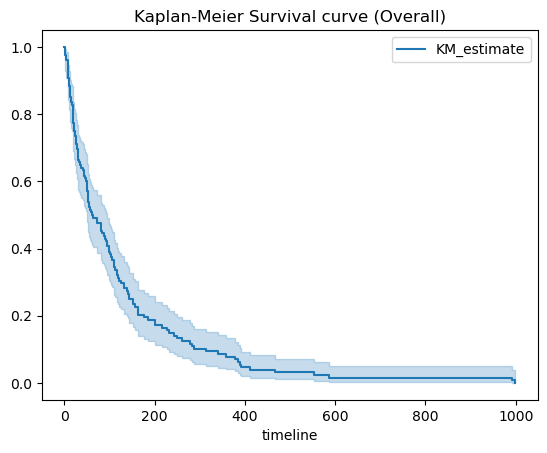

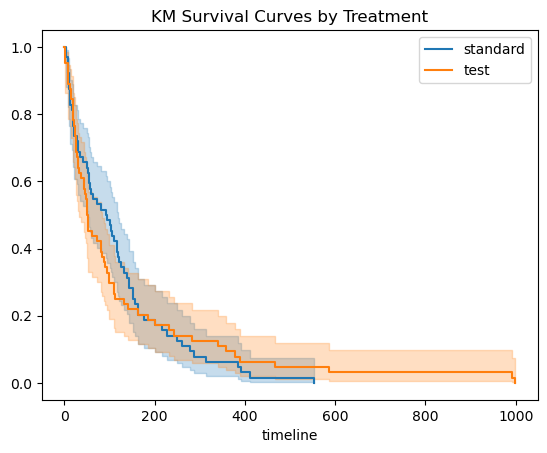

In [7]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
# Separate First and second rows per patient : Y=1 is death , Y=0 is start or censoring
df_event=df[df['Y']==1]
kmf=KaplanMeierFitter()
# Example : overall KM curve
kmf.fit(durations=df_event['TIME'],event_observed=df_event['Y'])
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival curve (Overall)')
plt.show()

# Example by treatment group
for trt_group in df_event['trt'].unique():
    mask=df_event['trt']==trt_group
    kmf.fit(df_event[mask]['TIME'],df_event[mask]['Y'],label = str(trt_group))
    kmf.plot_survival_function()

plt.title('KM Survival Curves by Treatment')
plt.show()

In [8]:
# Median Survival Time
for trt_group in df_event['trt'].unique():
    mask=df_event['trt']==trt_group
    kmf.fit(df_event[mask]['TIME'],df_event[mask]['Y'],label = str(trt_group))
    print(f"Median survival for treatment { trt_group}:{kmf.median_survival_time_}")

Median survival for treatment standard:95.0
Median survival for treatment test:52.0


In [9]:
from lifelines.statistics import logrank_test
group1 = df_event[df_event['trt']=='standard']
group2 = df_event[df_event['trt']=='test']
results = logrank_test(group1['TIME'],group2['TIME'],event_observed_A=group1['Y'],event_observed_B=group2['Y'])
print(results.summary)

   test_statistic        p  -log2(p)
0          0.0116  0.91423  0.129371


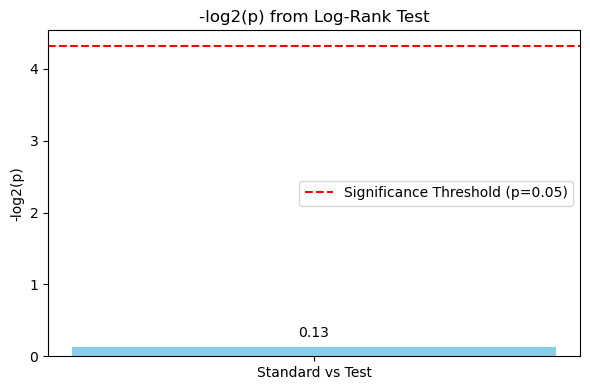

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example Data...
data = pd.DataFrame({
    'Group Comparision':['Standard vs Test'],
    'p':[0.91423],
})

# Compute -log2(p)
data['-log2(p)']=-np.log2(data['p'])
plt.figure(figsize=(6,4))
bars=plt.bar(data['Group Comparision'],data['-log2(p)'],color='skyblue')
# Threshold line: -Log2(0.05 = 4.32)
plt.axhline(-np.log2(0.05),color='red',linestyle='--',label='Significance Threshold (p=0.05)')

# Annote bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+0.1,round(yval,2),ha='center',va='bottom')

plt.title('-log2(p) from Log-Rank Test')
plt.ylabel('-log2(p)')
plt.legend()
plt.tight_layout()
plt.show()

<lifelines.CoxPHFitter: fitted with 128 total observations, 0 right-censored observations>
             duration col = 'TIME'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 128
number of events observed = 128
   partial log-likelihood = -465.21
         time fit was run = 2025-06-30 06:52:32 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
ID                   0.00       1.00       0.01            -0.03             0.03                 0.97                 1.03
karno               -0.03       0.97       0.01            -0.05            -0.02                 0.96                 0.98
diagtime            -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
age                 -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
trt_test             0.16       1.17       1.02            -1.84             2.16                 0.16                 8.63
celltype_large      -0.83       0.43       0.36            -1.53            -0.14                 0.22                 0.87
celltype_smallcell  -0.12       0.88       0.38            -0.88             0.63                 0.42                 1.88
celltype_squamous   -0.97       0.38       0.66            -2.27             0.33                 0.10                 1.38
priortherapy_yes     0.18       1.20       0.24            -0.28             0.65                 0.76                 1.91

                     cmp to     z      p   -log2(p)
covariate                                          
ID                     0.00  0.20   0.84       0.25
karno                  0.00 -6.08 <0.005      29.60
diagtime               0.00 -0.47   0.63       0.66
age                    0.00 -1.54   0.12       3.02
trt_test               0.00  0.16   0.88       0.19
celltype_large         0.00 -2.34   0.02       5.71
celltype_smallcell     0.00 -0.32   0.75       0.42
celltype_squamous      0.00 -1.47   0.14       2.82
priortherapy_yes       0.00  0.79   0.43       1.21
---
Concordance = 0.74
Partial AIC = 948.43
log-likelihood ratio test = 62.38 on 9 df
-log2(p) of ll-ratio test = 31.00

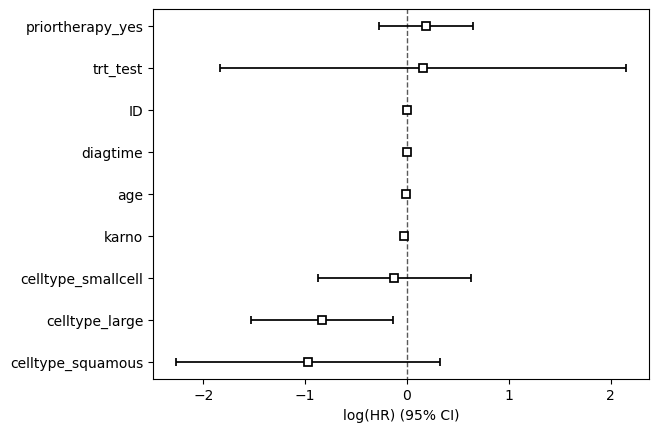

In [11]:
# Prepare wide-format data: one row per subject
df_wide = df_event.copy()

# Encode categorical variables
df_wide = pd.get_dummies(df_wide,columns=['trt','celltype','priortherapy'],drop_first=True)

cph=CoxPHFitter()
cph.fit(df_wide,duration_col='TIME',event_col='Y')
cph.print_summary()
cph.plot()
plt.show()

In [12]:
# Step 1: Separate rows by Y
df_start = df[df["Y"] == 0].copy() # Start of observation / censoring
df_event = df[df["Y"] == 1].copy() # Death

# Step 2: Merge on ID
# Bring over TIME as stop and Y as event
df_event = df_event.rename(columns={"TIME":"stop","Y":"event"})
df_start = df_start.rename(columns={"TIME":"start"})

df_timevarying = pd.merge(
    df_start,
    df_event[['ID','stop','event']],
    on="ID"
)

# Step 3: One-hot encode categorical variables
df_timevarying = pd.get_dummies(df_timevarying,columns=['trt','celltype','priortherapy'],drop_first=True)

# Final Check
print(df_timevarying[['ID','start','stop','event']].head())

   ID  start  stop  event
0   1      0    72      1
1   2      0   411      1
2   3      0   228      1
3   4      0   126      1
4   5      0   118      1


In [13]:
import numpy as np
# Check for NaNs
print("Any NaNs?",df_timevarying.isnull().values.any())
# Check for infinite values
print("Any Infs?",np.isinf(df_timevarying.select_dtypes(include=[np.number])).values.any())

Any NaNs? False
Any Infs? False


In [14]:
print(df_timevarying[df_timevarying.isnull().any(axis=1)])
print(df_timevarying[np.isinf(df_timevarying.select_dtypes(include=[np.number])).any(axis=1)])


Empty DataFrame
Columns: [ID, start, Y, karno, diagtime, age, stop, event, trt_test, celltype_large, celltype_smallcell, celltype_squamous, priortherapy_yes]
Index: []
Empty DataFrame
Columns: [ID, start, Y, karno, diagtime, age, stop, event, trt_test, celltype_large, celltype_smallcell, celltype_squamous, priortherapy_yes]
Index: []


In [15]:
# Ensure 'Y' is not in the modeling data
if 'Y' in df_timevarying.columns:
    df_timevarying.drop(columns=['Y'],inplace=True)
    

<lifelines.CoxTimeVaryingFitter: fitted with 128 periods, 128 subjects, 128 events>
         event col = 'event'
number of subjects = 128
 number of periods = 128
  number of events = 128
partial log-likelihood = -465.24
  time fit was run = 2025-06-30 06:52:33 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
karno               -0.03       0.97       0.01            -0.05            -0.02                 0.96                 0.98
diagtime            -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
age                 -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
trt_test             0.36       1.44       0.21            -0.05             0.77                 0.95                 2.17
celltype_large      -0.80       0.45       0.30            -1.38            -0.21                 0.25                 0.81
celltype_smallcell  -0.18       0.84       0.28            -0.72             0.36                 0.49                 1.44
celltype_squamous   -1.10       0.33       0.30            -1.68            -0.51                 0.19                 0.60
priortherapy_yes     0.18       1.19       0.23            -0.28             0.63                 0.76                 1.88

                     cmp to     z      p   -log2(p)
covariate                                          
karno                  0.00 -6.07 <0.005      29.52
diagtime               0.00 -0.45   0.65       0.61
age                    0.00 -1.53   0.12       3.00
trt_test               0.00  1.72   0.08       3.56
celltype_large         0.00 -2.65   0.01       6.95
celltype_smallcell     0.00 -0.65   0.52       0.96
celltype_squamous      0.00 -3.66 <0.005      11.94
priortherapy_yes       0.00  0.76   0.45       1.17
---
Partial AIC = 946.47
log-likelihood ratio test = 62.34 on 8 df
-log2(p) of ll-ratio test = 32.53

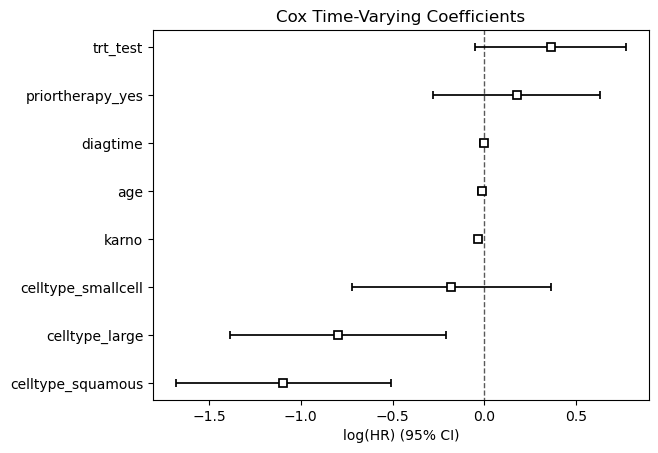

In [16]:
from lifelines import CoxTimeVaryingFitter
# Initialise the Cox time-varying model
ctv = CoxTimeVaryingFitter()

# Fit the model using the transformed dataframe
ctv.fit(
    df_timevarying,
    id_col='ID',
    start_col='start',
    stop_col='stop',
    event_col='event'    # This reflects the renamed column
)

# Print model summart
ctv.print_summary()

# Plot coefficients
ctv.plot()
plt.title("Cox Time-Varying Coefficients")
plt.show()

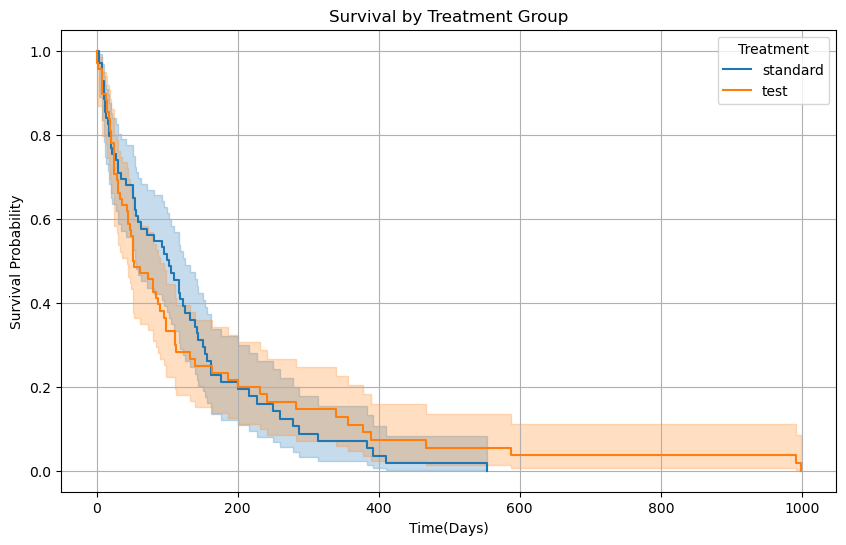

In [17]:
kmf=KaplanMeierFitter()
plt.figure(figsize=(10,6))
for group in df['trt'].unique():
    label=str(group)
    mask=df['trt']==group
    kmf.fit(df[mask]['TIME'],event_observed=df[mask]['Y'],label=label)
    kmf.plot_survival_function()
plt.title("Survival by Treatment Group")
plt.xlabel("Time(Days)")
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend(title="Treatment")
plt.show()

In [18]:
from lifelines.statistics import logrank_test

# Assuming 'trt' column has two treatment types: 'standard' and 'test'
group1 = df[df['trt'] == 'standard']
group2 = df[df['trt'] == 'test']

# Perform the Log-rank test
results = logrank_test(
    group1['TIME'],
    group2['TIME'],
    event_observed_A=group1['Y'],
    event_observed_B=group2['Y']
)

# Output the p-value
print(f"Log-Rank Test p-value: {results.p_value:.4f}")

if results.p_value < 0.05:
    print("+ Significant difference in survival.")
else:
    print("+ No statistically significant difference.")

Log-Rank Test p-value: 0.9277
+ No statistically significant difference.


In [20]:
import pandas as pd
from lifelines import CoxPHFitter

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['celltype', 'trt', 'priortherapy'], drop_first=True)

# Collect dummy variable columns
celltype_dummies = [col for col in df_encoded.columns if col.startswith('celltype_')]
treatment_dummies = [col for col in df_encoded.columns if col.startswith('trt_')]
prior_dummies = [col for col in df_encoded.columns if col.startswith('priortherapy_')]

# Define the final set of features
features = ['TIME', 'Y', 'age', 'karno', 'diagtime'] + celltype_dummies + treatment_dummies + prior_dummies

# Prepare the dataset
cox_df = df_encoded[features]

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(cox_df, duration_col='TIME', event_col='Y')

# Print the summary of the model
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 274 total observations, 146 right-censored observations>
             duration col = 'TIME'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 274
number of events observed = 128
   partial log-likelihood = -474.40
         time fit was run = 2025-06-30 07:03:41 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
age                 -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
karno               -0.03       0.97       0.01            -0.04            -0.02                 0.96                 0.98
diagtime             0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
celltype_large      -0.79       0.45       0.30            -1.39            -0.20                 0.25                 0.82
celltype_smallcell  -0.33       0.72       0.28            -0.88             0.21                 0.42                 1.23
celltype_squamous   -1.20       0.30       0.30            -1.79            -0.61                 0.17                 0.55
trt_test             0.29       1.34       0.21            -0.11             0.70                 0.89                 2.02
priortherapy_yes     0.07       1.07       0.23            -0.38             0.53                 0.68                 1.69

                     cmp to     z      p   -log2(p)
covariate                                          
age                    0.00 -0.94   0.35       1.52
karno                  0.00 -5.96 <0.005      28.55
diagtime               0.00  0.01   0.99       0.01
celltype_large         0.00 -2.62   0.01       6.85
celltype_smallcell     0.00 -1.21   0.23       2.15
celltype_squamous      0.00 -3.97 <0.005      13.79
trt_test               0.00  1.42   0.16       2.68
priortherapy_yes       0.00  0.31   0.76       0.40
---
Concordance = 0.74
Partial AIC = 964.79
log-likelihood ratio test = 62.10 on 8 df
-log2(p) of ll-ratio test = 32.37